<a href="https://colab.research.google.com/github/LGErthal/mask_detector/blob/main/mask_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import database

In [ ]:
# https://drive.google.com/file/d/1IqDRGWstRDqg9QdQhcrK7i65Yu02W21_/view
!gdown --id 1IqDRGWstRDqg9QdQhcrK7i65Yu02W21_

Downloading...
From: https://drive.google.com/uc?id=1IqDRGWstRDqg9QdQhcrK7i65Yu02W21_
To: /content/data.zip
378MB [00:03, 111MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall()

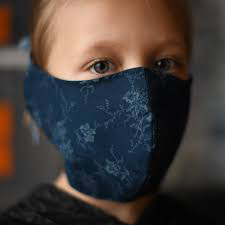

In [ ]:
import glob
from PIL import Image
import random
with_mask_list = glob.glob('/content/data/pictures/with_mask/*.*')
Image.open(random.choice(with_mask_list))

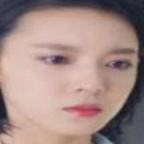

In [ ]:
without_mask_list = glob.glob('/content/data/pictures/without_mask/*.*')
img = Image.open(random.choice(without_mask_list))
img

In [ ]:
print("Com máscara:", len(with_mask_list), "imagens")
print("Sem máscara:", len(without_mask_list), "imagens")

Com máscara: 3945 imagens
Sem máscara: 4048 imagens


In [ ]:
import numpy as np

img_pixels = np.array(img)

In [ ]:
img_pixels

array([[[121, 138, 146],
        [125, 139, 148],
        [124, 138, 149],
        ...,
        [252, 255, 253],
        [250, 255, 249],
        [254, 255, 249]],

       [[132, 146, 155],
        [125, 139, 148],
        [132, 146, 157],
        ...,
        [253, 255, 252],
        [253, 255, 249],
        [254, 255, 249]],

       [[127, 141, 150],
        [122, 136, 145],
        [132, 146, 157],
        ...,
        [253, 255, 250],
        [252, 255, 248],
        [250, 251, 243]],

       ...,

       [[ 44,  52,  98],
        [ 44,  55, 100],
        [ 32,  45,  89],
        ...,
        [ 39, 146, 178],
        [ 40, 147, 179],
        [ 43, 146, 181]],

       [[ 52,  63, 108],
        [ 42,  53,  98],
        [ 39,  52,  96],
        ...,
        [ 43, 150, 182],
        [ 38, 145, 177],
        [ 45, 148, 183]],

       [[ 36,  47,  92],
        [ 39,  50,  95],
        [ 37,  50,  94],
        ...,
        [ 44, 151, 183],
        [ 40, 147, 179],
        [ 45, 148, 183]]

In [ ]:
!pip install deepfeatx --quiet

In [ ]:
from deepfeatx.image import ImageFeatureExtractor

In [ ]:
fe = ImageFeatureExtractor()

In [ ]:
vector = fe.img_to_vector(img)

In [ ]:
vector.shape

(1, 2048)

In [ ]:
fe.extract_features_from_directory?

In [ ]:
df = fe.extract_features_from_directory('/content/data/pictures', 
                                   classes_as_folders=True,
                                   export_class_names=True)

Found 7993 images belonging to 2 classes.
 81/250 [========>.....................] - ETA: 25s

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 43s 162ms/step


In [ ]:
df.head()

,filepaths,classes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,/content/data/pictures/with_mask/image_0.png,with_mask,0.038728,0.884571,0.145152,0.289124,0.159533,0.302130,0.799904,0.624659,0.000000,0.536666,0.000000,0.124027,0.014848,0.218985,0.182428,0.701480,0.000000,0.003363,0.456969,0.081808,0.067931,4.386364,0.011629,0.906452,0.023252,0.133682,0.000000,0.321479,0.000000,0.108322,0.029827,0.777087,0.023752,0.189514,1.215708,1.091062,0.690737,0.174090,...,0.339070,0.149166,0.247206,0.775108,0.900572,0.355789,0.718434,0.014150,0.004027,0.154375,0.689589,0.010095,0.364867,0.000126,0.004006,0.001322,0.562172,0.394834,0.118521,0.298972,0.009223,0.179920,0.000136,0.228558,0.140571,0.065109,0.055526,0.187462,0.871076,2.080386,0.016260,0.404927,0.062483,0.140094,0.037467,0.039643,0.000000,0.000806,0.000000,0.301593
1,/content/data/pictures/with_mask/image_1.png,with_mask,0.754308,0.528981,0.012560,0.062730,0.000000,0.000000,0.027178,0.392129,0.105666,2.254382,3.669287,0.867389,1.217087,0.091142,0.907784,0.370734,0.302326,0.587382,1.946053,0.002852,0.052934,0.214101,0.322846,2.277997,0.156309,0.748763,0.027605,2.217845,0.165846,1.808478,0.611898,0.760049,0.033616,0.349569,0.150578,0.324045,0.606516,0.192061,...,0.879131,0.297442,1.090993,0.066868,0.601435,0.119778,0.611670,0.005615,0.187574,0.000000,0.715241,2.140781,0.074462,0.000000,0.149694,0.107843,0.000000,0.024265,0.095110,0.101663,0.108712,0.182066,0.831868,0.695756,0.608609,0.708762,0.843656,0.358287,0.508740,0.035592,0.454395,0.000000,1.435934,0.006064,0.234882,0.139631,0.060959,0.108313,0.454269,0.025376
2,/content/data/pictures/with_mask/image_10.png,with_mask,0.197473,1.517342,1.466245,1.681323,0.050287,0.546829,0.374658,0.527165,1.284537,0.390843,1.110770,0.281560,0.699325,0.055652,0.197108,0.827597,0.242554,0.341359,0.838308,0.046601,0.803697,2.945495,0.236531,0.933820,0.364316,0.160231,0.501456,0.370829,0.101748,0.264983,0.055136,0.400271,0.140757,0.551762,0.255218,1.017882,1.070645,2.420799,...,0.390632,0.483884,0.063059,0.024577,0.541015,0.087208,0.135612,0.176239,0.372269,0.058101,0.197527,0.387998,0.914874,0.307845,0.010666,0.007693,0.374086,0.835617,0.225133,0.035383,1.396632,0.410349,0.492073,0.026497,0.185682,0.231607,0.467450,0.000000,0.545193,0.163750,0.210841,1.517007,0.726422,0.375910,0.090220,1.045121,0.000000,0.591376,0.143809,0.473014
3,/content/data/pictures/with_mask/image_100.png,with_mask,0.798181,0.596340,0.116794,0.297160,0.188630,0.217077,0.025765,0.372646,0.110953,0.120063,1.323063,0.000000,0.099938,0.178318,0.788992,0.173998,0.005253,0.539339,0.311609,0.115507,2.249338,1.111960,0.029066,0.683582,0.075254,0.518563,0.078177,0.276534,0.090847,0.313089,0.128852,2.282387,0.323765,1.870574,0.913400,0.006154,0.532218,0.300856,...,0.509247,0.305446,0.302293,0.027365,0.001218,0.200144,0.000000,0.327193,0.627200,0.066116,0.157596,0.999760,0.013626,0.000000,1.712726,0.569567,1.057795,0.013006,0.288060,1.780886,0.422848,1.228930,0.300683,0.089794,2.613133,0.075552,0.259099,0.049631,0.000000,0.000000,0.419838,0.341017,0.635665,0.585333,0.160089,0.000000,0.073669,0.037409,0.180549,0.793651
4,/content/data/pictures/with_mask/image_101.png,with_mask,0.072735,0.745071,0.216339,0.683348,0.090899,0.264745,0.090748,0.055045,0.088696,0.157138,1.389151,0.275101,0.176963,0.106506,0.622201,0.206308,0.014517,0.030691,0.091511,0.029294,0.930180,1.109621,0.175623,1.517426,0.379227,0.029312,0.003012,1.615560,0.175487,0.070150,0.048155,0.055573,0.857559,0.468782,2.156049,1.321784,0.439412,0.714343,...,0.190822,0.404356,0.904894,1.627532,0.158723,0.369292,0.011870,0.120793,0.458568,1.766826,0.301147,1.063182,0.000000,0.244074,0.029428,0.135284,0.088551,0.061994,0.599154,0.314200,0.001926,0.465260,0.000000,0.0410

In [ ]:
df.shape

(7993, 2050)

In [ ]:
y = df['classes']
X = df.drop(['filepaths', 'classes'], axis=1)

In [ ]:
np.random.seed(seed=42)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
y_test.value_counts()

without_mask    1009
with_mask        990
Name: classes, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(X_test, y_test)

0.9954977488744372

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   with_mask       0.99      1.00      1.00       990
without_mask       1.00      1.00      1.00      1009

    accuracy                           1.00      1999
   macro avg       1.00      1.00      1.00      1999
weighted avg       1.00      1.00      1.00      1999



Text(33.0, 0.5, 'Real')

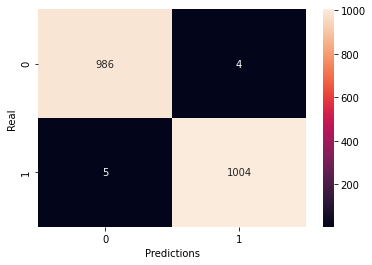

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Real')

In [ ]:
import pickle
pickle.dump(lr, open('logistic_regression.pkl', 'wb'))

In [ ]:
!pip install gradio --quiet

In [ ]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
import gradio as gr
from PIL import Image

def recognize_mask(img):
    img=Image.fromarray(img)
    vector = fe.img_to_vector(img)
    label = lr.predict(vector)
    confidence = lr.predict_proba(vector)
    return label[0], confidence[0]

In [ ]:
gr.Interface(fn=recognize_mask, inputs="image", outputs="text").launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://29477.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7872/',
 'https://29477.gradio.app')

In [ ]:
webcam = gr.inputs.Image(shape=(224, 224), source="webcam")
gr.Interface(fn=recognize_mask, inputs=webcam, outputs="text").launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://44309.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7874/',
 'https://44309.gradio.app')